<a href="https://colab.research.google.com/github/padolekrushna/Projects_on_ML/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI Soil Analysis ML Model

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import joblib
import warnings

warnings.filterwarnings('ignore')

##Data Loading

In [39]:
# Load combined dataset
file_path = "/content/final_combined_soil_dataset.csv"
df = pd.read_csv(file_path)
df

,NIR_Spectroscopy_900nm,NIR_Spectroscopy_2500nm,Visible_Light_400nm,Visible_Light_700nm,Temperature_C,Moisture_Content_%,pH_Level,Electrical_Conductivity_dS_m,GPS_Latitude,GPS_Longitude,Time_of_Measurement,Nutrient_Nitrogen_mg_kg,Nutrient_Phosphorus_mg_kg,Nutrient_Potassium_mg_kg,Organic_Matter_%,Soil_Type,Fertility_Score,Water_Retention_Capacity,Lime_Requirement,Soil_Erosion_Risk
0,0.686902,0.303646,0.483194,0.670892,27.159876,18.777243,7.093028,0.173719,39.648226,148.888084,183,21.544910,17.854924,118.604538,2.136003,Clay,51.292969,NaN,NaN,NaN
1,1.435929,0.696091,0.472885,0.757677,34.162970,21.570248,5.189545,0.454868,33.710941,9.129773,352,30.217490,43.914515,71.587477,4.976362,Loamy,53.314026,NaN,NaN,NaN
2,1.151592,1.060240,0.934378,0.375328,32.804828,34.909159,7.989578,1.679367,-72.764244,80.967698,36,82.999544,44.830369,86.520318,3.070460,Loamy,47.810695,NaN,NaN,NaN
3,0.978256,0.905447,0.474682,0.637412,14.616997,16.900154,6.952465,1.556860,76.063033,-23.022613,37,89.066549,7.022095,23.024174,2.626759,Loamy,67.374057,NaN,NaN,NaN
4,0.402824,0.987217,0.490365,0.600222,14.477484,35.437739,5.128816,0.766221,12.324996,46.812448,14,16.430624,12.564076,37.572158,2.731711,Loamy,57.194536,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.319057,0.822651,0.905707,0.509475,36.921920,28.955238,6.818948,0.619003,2.687309,128.756156,216,78.046445,32.801688,10.070341,0.718824,Clay,43.397935,3.380236,3.324816,0.000000
1996,1.392508,1.152276,0.410091,0.434081,13.581430,22.612715,7.168147,0.498087,-60.233323,143.103181,256,18.830699,38.822738,61.332697,3.540325,Sandy,31.100281,3.327744,3.539918,0.000000
1997,0.377864,0.175854,0.516852,0.476201,19.835285,31.780210,8.146308,0.965125,85.988306,160.814849,316,50.222421,14.630002,63.522335,4.040785,Loamy,91.604868,4.393493,2.661849,0.000000
1998,1.435309,0.162760,0.503032,0.570958,34.472361,21.985172,5.882481,1.826031,-70.573580,-36.904323,316,76.060392,37.242044,104.944401,4.810409,Loamy,40.680228,3.454723,5.079601,0.000000


##Cleaning

In [40]:
print("Data inspection and cleaning...")
# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())


Data inspection and cleaning...
Dataset shape: (2000, 20)

First few rows:
   NIR_Spectroscopy_900nm  NIR_Spectroscopy_2500nm  Visible_Light_400nm  \
0                0.686902                 0.303646             0.483194   
1                1.435929                 0.696091             0.472885   
2                1.151592                 1.060240             0.934378   
3                0.978256                 0.905447             0.474682   
4                0.402824                 0.987217             0.490365   

   Visible_Light_700nm  Temperature_C  Moisture_Content_%  pH_Level  \
0             0.670892      27.159876           18.777243  7.093028   
1             0.757677      34.162970           21.570248  5.189545   
2             0.375328      32.804828           34.909159  7.989578   
3             0.637412      14.616997           16.900154  6.952465   
4             0.600222      14.477484           35.437739  5.128816   

   Electrical_Conductivity_dS_m  GPS_Latitude  

In [41]:
# Check data types and missing values
print("\nData types and non-null counts:")
print(df.info())



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NIR_Spectroscopy_900nm        2000 non-null   float64
 1   NIR_Spectroscopy_2500nm       2000 non-null   float64
 2   Visible_Light_400nm           2000 non-null   float64
 3   Visible_Light_700nm           2000 non-null   float64
 4   Temperature_C                 2000 non-null   float64
 5   Moisture_Content_%            2000 non-null   float64
 6   pH_Level                      2000 non-null   float64
 7   Electrical_Conductivity_dS_m  2000 non-null   float64
 8   GPS_Latitude                  2000 non-null   float64
 9   GPS_Longitude                 2000 non-null   float64
 10  Time_of_Measurement           2000 non-null   int64  
 11  Nutrient_Nitrogen_mg_kg       2000 non-null   float64
 12  Nutrient_Phosphorus_mg_kg    

In [42]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
NIR_Spectroscopy_900nm             0
NIR_Spectroscopy_2500nm            0
Visible_Light_400nm                0
Visible_Light_700nm                0
Temperature_C                      0
Moisture_Content_%                 0
pH_Level                           0
Electrical_Conductivity_dS_m       0
GPS_Latitude                       0
GPS_Longitude                      0
Time_of_Measurement                0
Nutrient_Nitrogen_mg_kg            0
Nutrient_Phosphorus_mg_kg          0
Nutrient_Potassium_mg_kg           0
Organic_Matter_%                   0
Soil_Type                          0
Fertility_Score                    0
Water_Retention_Capacity        1000
Lime_Requirement                1000
Soil_Erosion_Risk               1000
dtype: int64


In [43]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    soil_data = df.drop_duplicates()
    print("Duplicates removed.")


Number of duplicate rows: 0


In [44]:
# Check for outliers using IQR method for numerical columns
print("\nChecking for outliers...")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
outliers_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers_summary[col] = outliers

print("Outliers per column:")
for col, count in outliers_summary.items():
    if count > 0:
        print(f"{col}: {count} outliers")


Checking for outliers...
Outliers per column:
Soil_Erosion_Risk: 198 outliers


In [45]:
# Identify outliers in 'Soil_Erosion_Risk' using the IQR method
Q1 = df["Soil_Erosion_Risk"].quantile(0.25)
Q3 = df["Soil_Erosion_Risk"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median value (conservative treatment)
median_value = df["Soil_Erosion_Risk"].median()
outlier_mask = (df["Soil_Erosion_Risk"] < lower_bound) | (df["Soil_Erosion_Risk"] > upper_bound)
df.loc[outlier_mask, "Soil_Erosion_Risk"] = median_value

# Output number of outliers treated
treated_count = outlier_mask.sum()
treated_count


np.int64(198)

In [46]:
# Step 1: Recalculate IQR bounds
Q1 = df["Soil_Erosion_Risk"].quantile(0.25)
Q3 = df["Soil_Erosion_Risk"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Create mask for any remaining outliers
outlier_mask_post = (df["Soil_Erosion_Risk"] < lower_bound) | (df["Soil_Erosion_Risk"] > upper_bound)
remaining_outliers = outlier_mask_post.sum()

# Step 3: Output result
if remaining_outliers == 0:
    print("✅ No outliers remain in 'Soil_Erosion_Risk' column.")
else:
    print(f"⚠️ {remaining_outliers} outliers still exist in 'Soil_Erosion_Risk'.")


✅ No outliers remain in 'Soil_Erosion_Risk' column.


##Exploratory Data Analysis (EDA)

In [47]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe().T)


Summary statistics:
                               count        mean         std         min  \
NIR_Spectroscopy_900nm        2000.0    0.837334    0.379684    0.206022   
NIR_Spectroscopy_2500nm       2000.0    0.657719    0.321328    0.103540   
Visible_Light_400nm           2000.0    0.651684    0.203421    0.300008   
Visible_Light_700nm           2000.0    0.543263    0.200492    0.200457   
Temperature_C                 2000.0   24.823160    8.602146   10.000922   
Moisture_Content_%            2000.0   22.446257   10.119286    5.216434   
pH_Level                      2000.0    6.473235    1.158645    4.505713   
Electrical_Conductivity_dS_m  2000.0    1.016504    0.541202    0.100458   
GPS_Latitude                  2000.0   -2.430595   50.789506  -89.956272   
GPS_Longitude                 2000.0   -1.153806  101.549754 -179.980982   
Time_of_Measurement           2000.0  185.126000  107.763884    1.000000   
Nutrient_Nitrogen_mg_kg       2000.0   54.135800   26.064954   10.0

In [48]:
# Missing values per column
missing_values = df.isnull().sum()
missing_values

,0
NIR_Spectroscopy_900nm,0
NIR_Spectroscopy_2500nm,0
Visible_Light_400nm,0
Visible_Light_700nm,0
Temperature_C,0
Moisture_Content_%,0
pH_Level,0
Electrical_Conductivity_dS_m,0
GPS_Latitude,0
GPS_Longitude,0


In [49]:

# Correlation matrix
corr = df.corr(numeric_only=True)
corr

,NIR_Spectroscopy_900nm,NIR_Spectroscopy_2500nm,Visible_Light_400nm,Visible_Light_700nm,Temperature_C,Moisture_Content_%,pH_Level,Electrical_Conductivity_dS_m,GPS_Latitude,GPS_Longitude,Time_of_Measurement,Nutrient_Nitrogen_mg_kg,Nutrient_Phosphorus_mg_kg,Nutrient_Potassium_mg_kg,Organic_Matter_%,Fertility_Score,Water_Retention_Capacity,Lime_Requirement,Soil_Erosion_Risk
NIR_Spectroscopy_900nm,1.000000,0.029310,0.014518,-0.029424,0.034785,-0.059440,0.027269,-0.025491,-0.040870,0.060702,0.021284,0.035067,0.039770,-0.026456,-0.003448,-0.006131,-0.056926,-0.027822,NaN
NIR_Spectroscopy_2500nm,0.029310,1.000000,0.027262,-0.005791,0.032911,0.029994,0.042327,0.049960,0.003279,-0.065495,0.034250,0.029416,-0.014630,-0.052323,0.007616,0.039655,0.033303,-0.040291,NaN
Visible_Light_400nm,0.014518,0.027262,1.000000,-0.013560,-0.008858,-0.020353,-0.028299,-0.046775,-0.005227,0.013119,0.005284,-0.003364,-0.012363,-0.048431,-0.066335,0.053434,-0.037842,0.013264,NaN
Visible_Light_700nm,-0.029424,-0.005791,-0.013560,1.000000,-0.044812,0.039959,-0.017133,-0.022849,0.025397,0.004490,0.040094,0.033409,0.010777,0.026177,-0.023078,0.053820,0.031997,0.011844,NaN
Temperature_C,0.034785,0.032911,-0.008858,-0.044812,1.000000,-0.055864,0.020511,-0.008889,0.028328,0.005123,-0.035324,-0.014296,-0.052452,-0.014482,0.038542,-0.025547,-0.043356,-0.011743,NaN
Moisture_Content_%,-0.059440,0.029994,-0.020353,0.039959,-0.055864,1.000000,0.007983,0.012288,-0.031942,-0.002803,0.030915,0.028733,-0.039621,0.000781,-0.013799,-0.013093,0.965664,-0.011001,NaN
pH_Level,0.027269,0.042327,-0.028299,-0.017133,0.020511,0.007983,1.000000,0.038155,0.001169,0.013190,-0.005834,-0.018771,0.016541,0.025251,0.076821,-0.026530,0.082363,-0.974910,NaN
Electrical_Conductivity_dS_m,-0.025491,0.049960,-0.046775,-0.022849,-0.008889,0.012288,0.038155,1.000000,-0.049307,-0.008831,0.031007,-0.029314,0.023631,-0.022677,-0.046322,-0.022479,0.002457,-0.048194,NaN
GPS_Latitude,-0.040870,0.003279,-0.005227,0.025397,0.028328,-0.031942,0.001169,-0.049307,1.000000,0.017458,0.021075,0.017472,-0.062584,0.011781,0.070191,-0.012402,-0.013357,0.014511,NaN
GPS_Longitude,0.060702,-0.065495,0.013119,0.004490,0.005123,-0.002803,0.013190,-0.008831,0.017458,1.000000,0.009283,0.032723,0.045607,-0.053128,-0.030966,-0.046432,-0.009713,-0.019999,NaN


Text(0.5, 1.0, 'Correlation Heatmap')

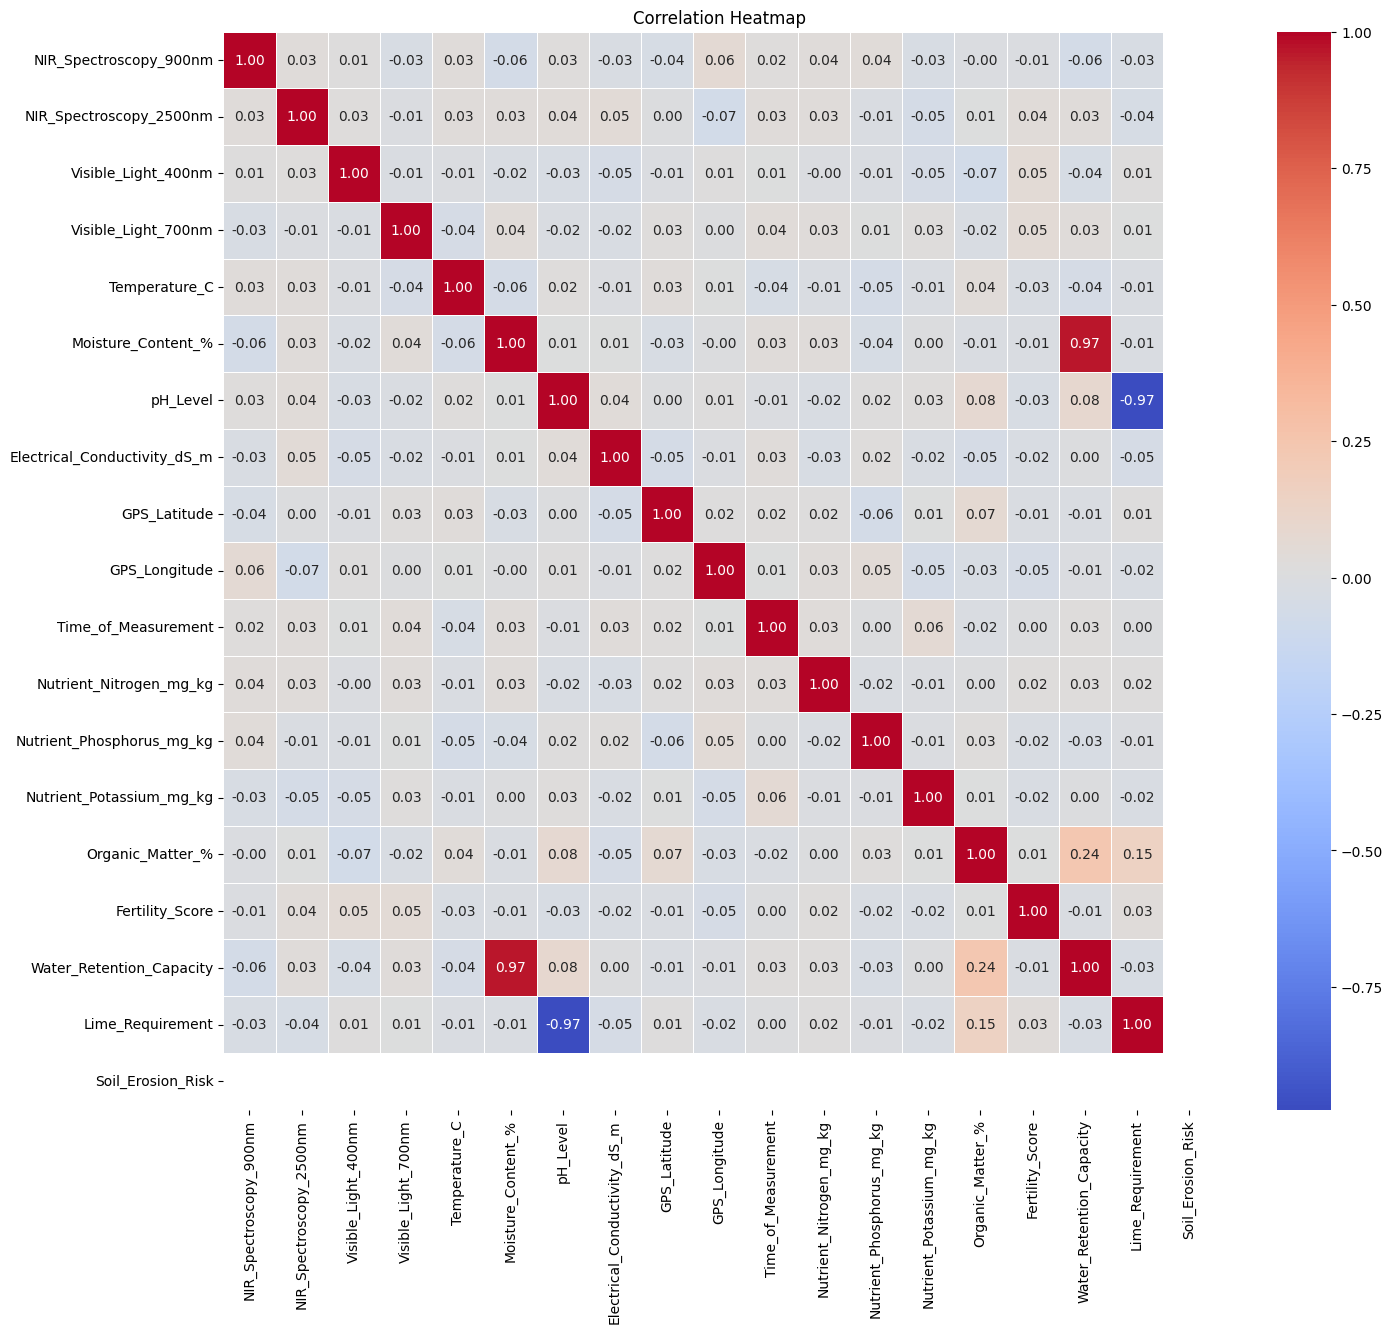

In [50]:
# Plot correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")

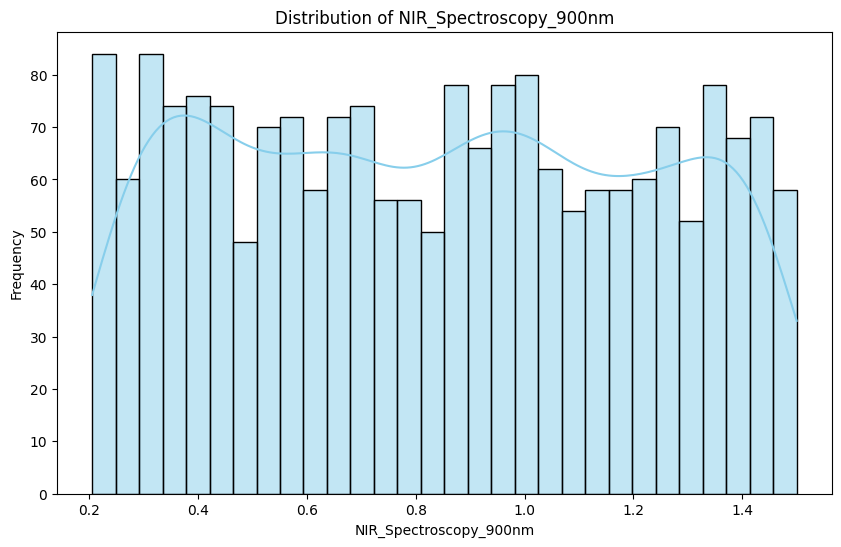

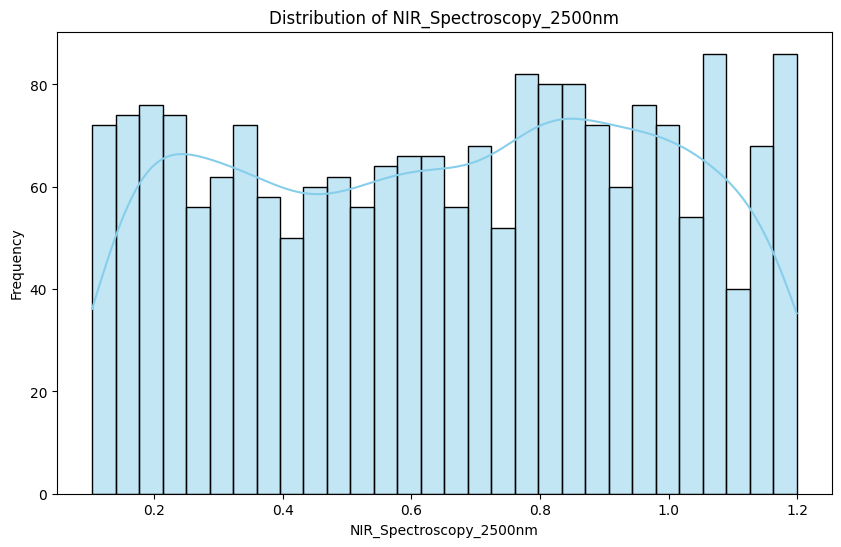

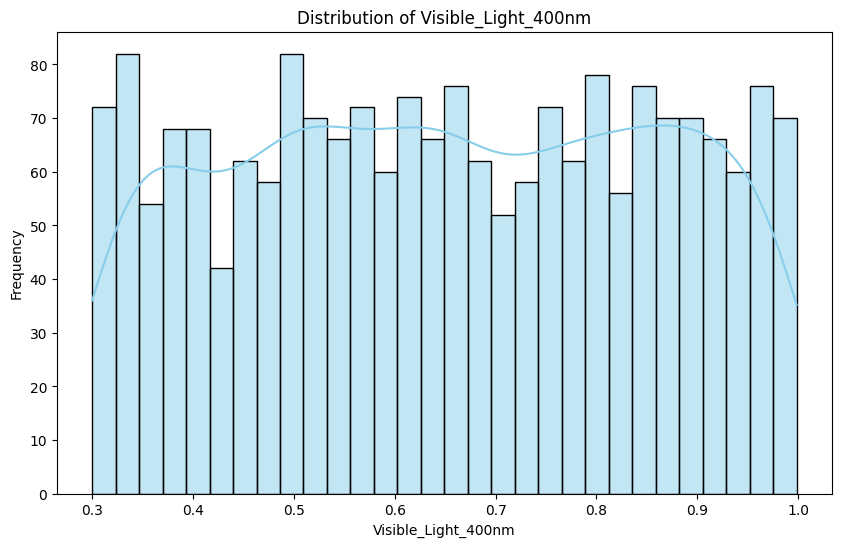

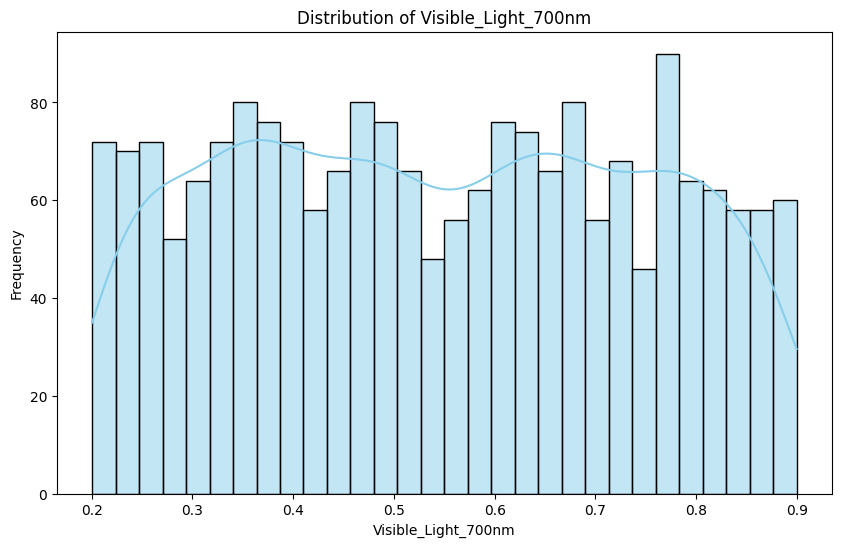

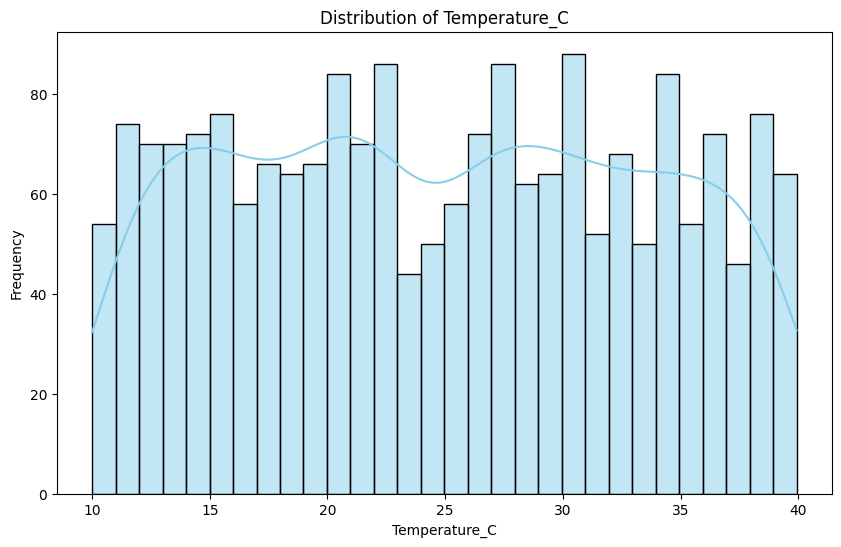

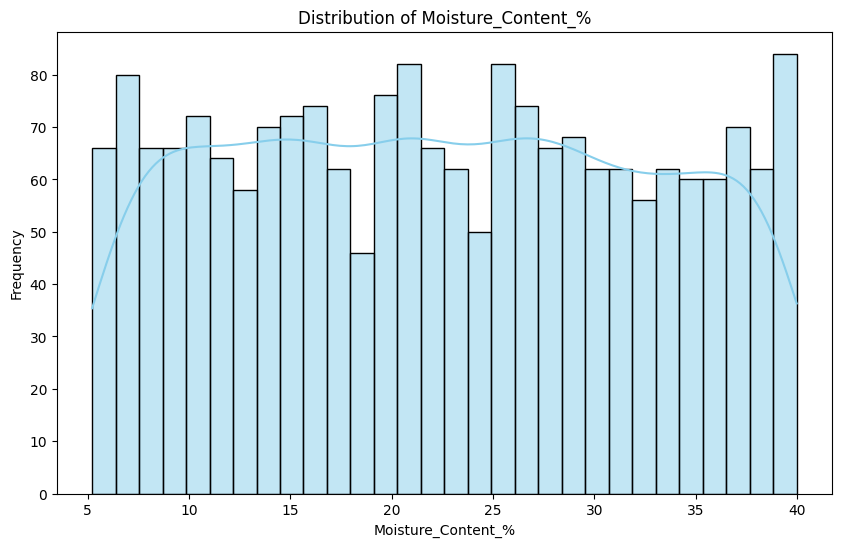

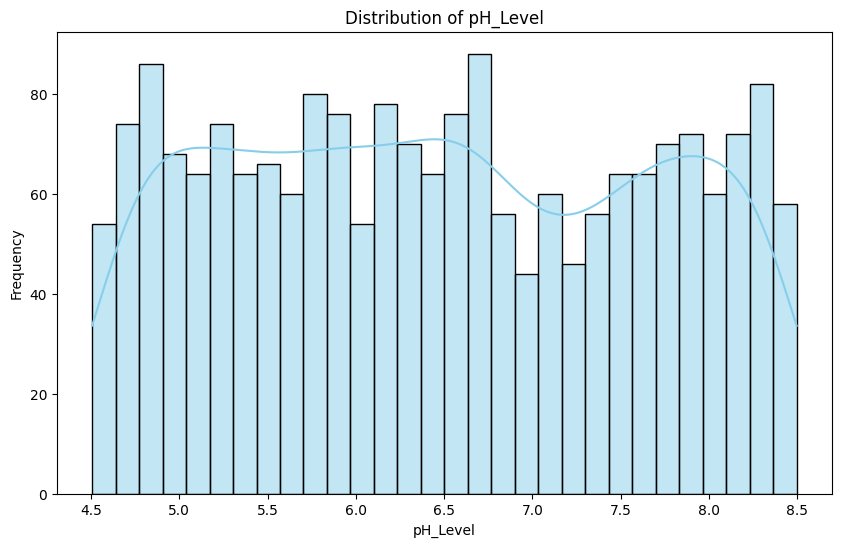

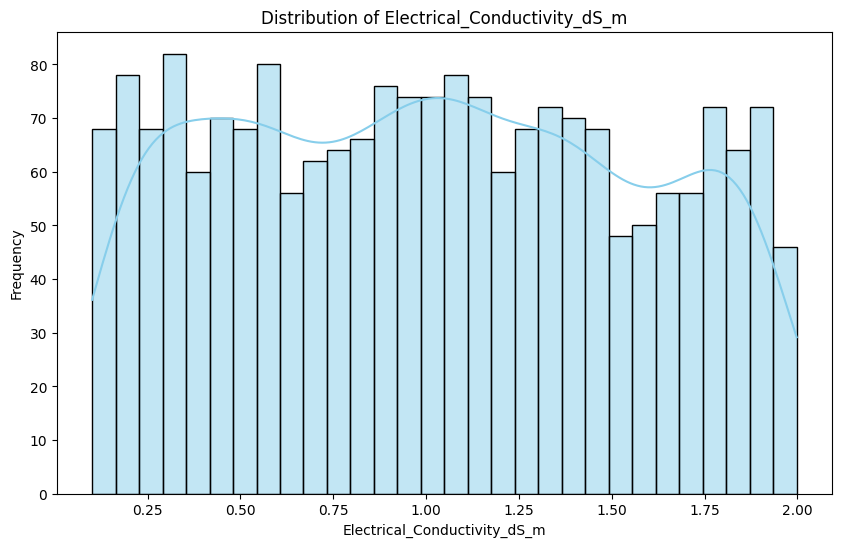

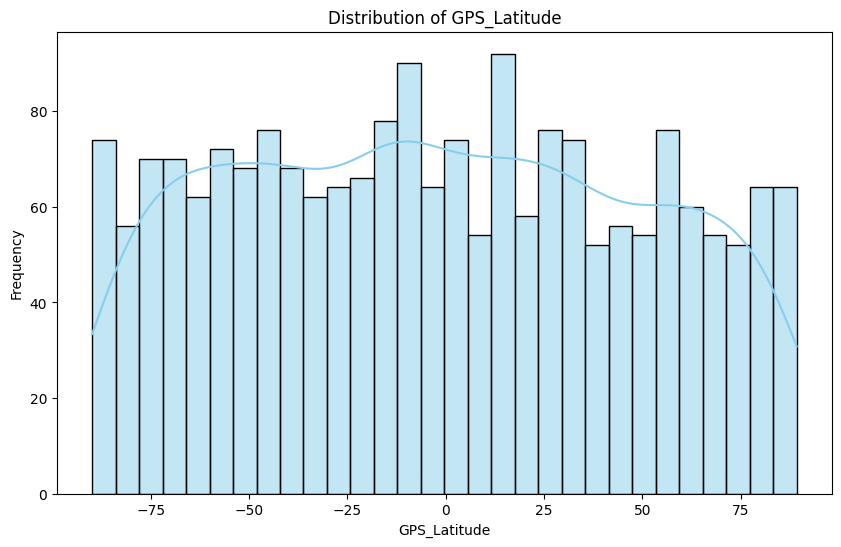

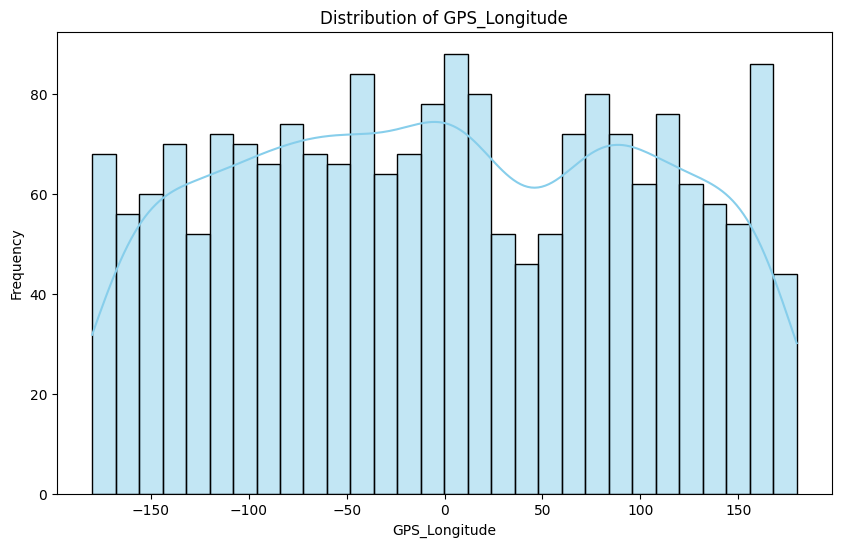

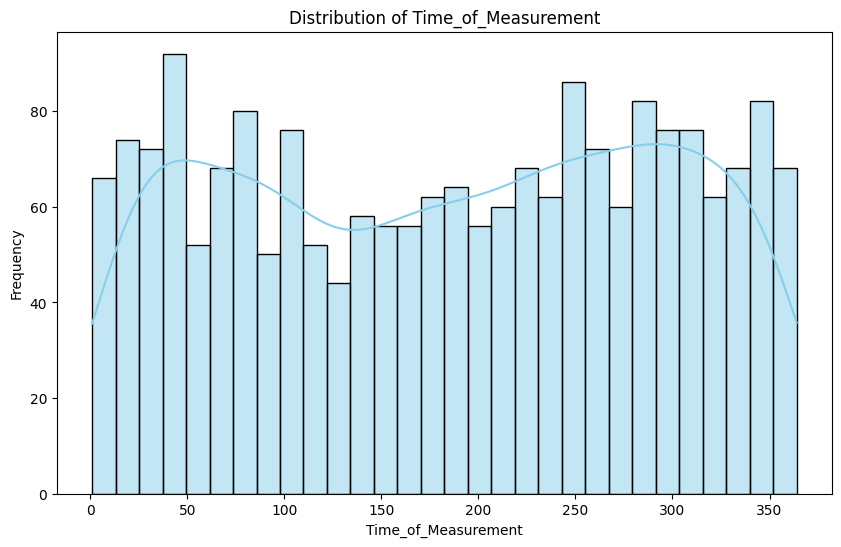

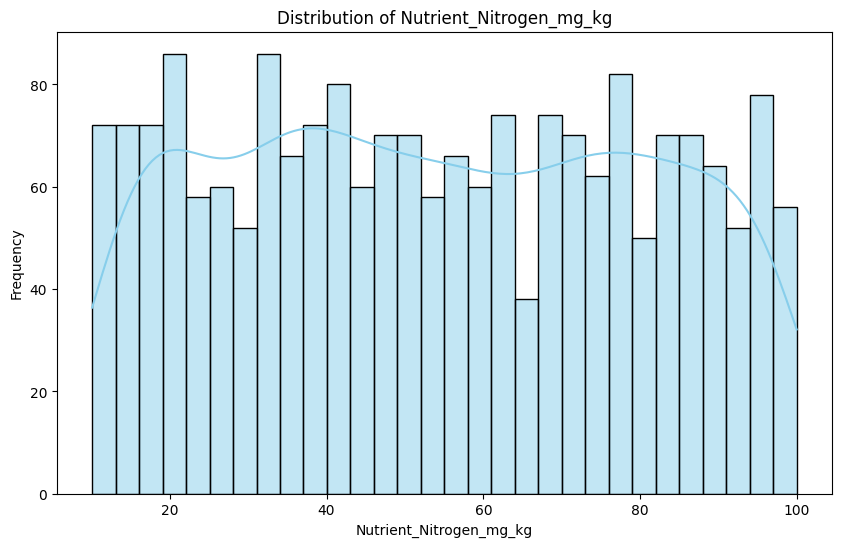

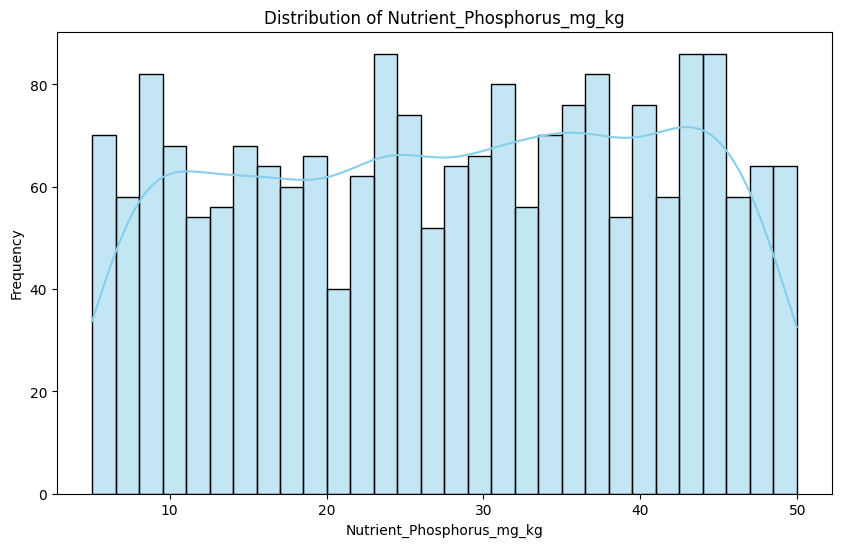

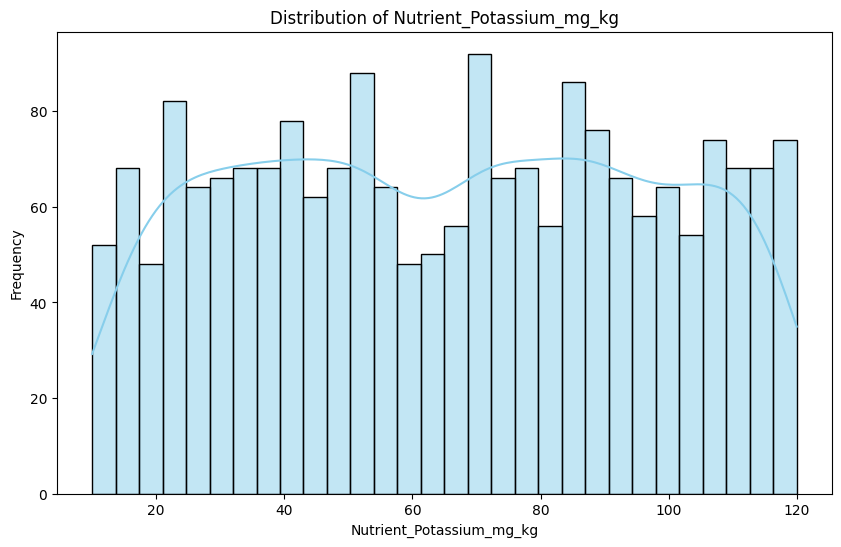

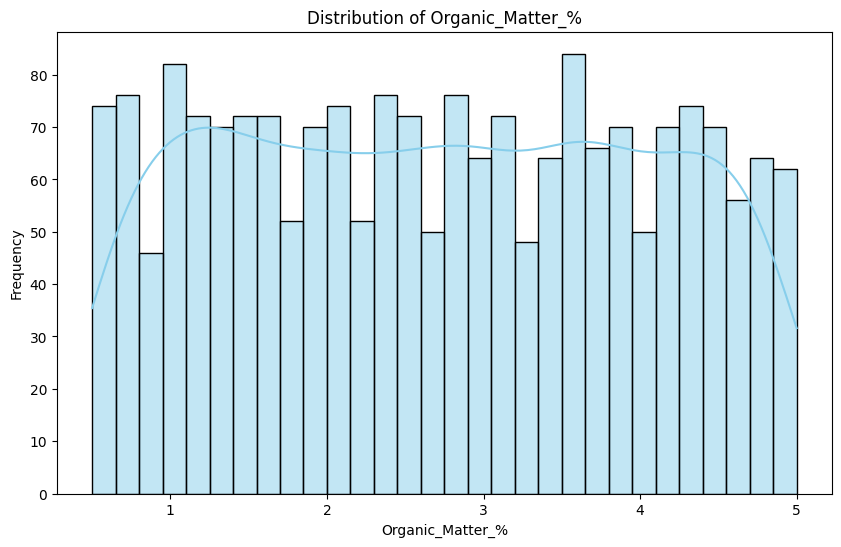

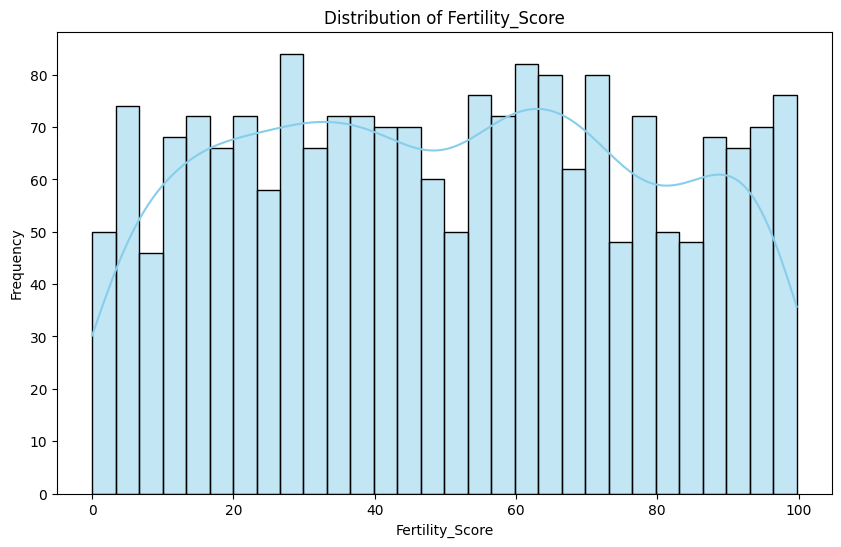

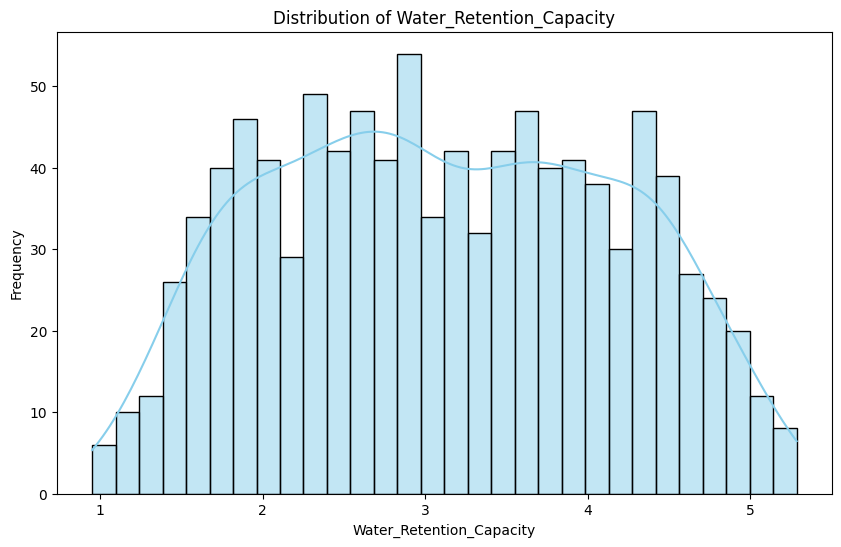

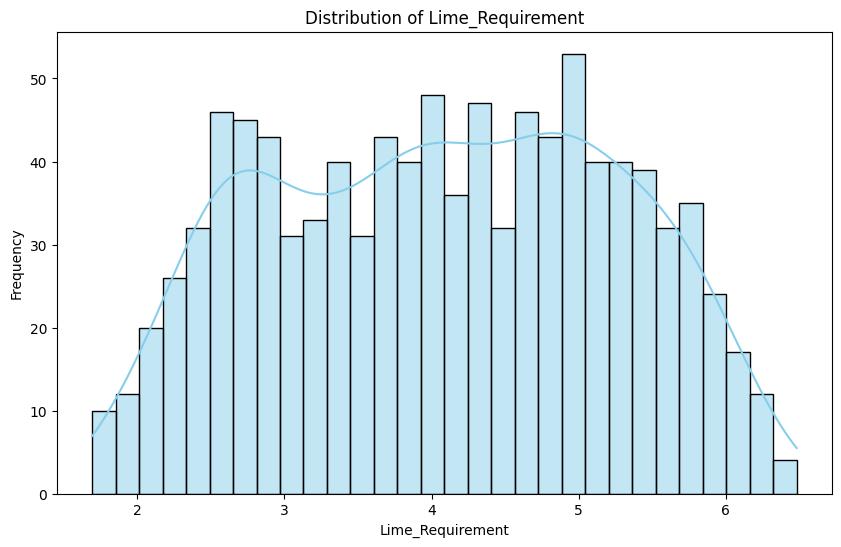

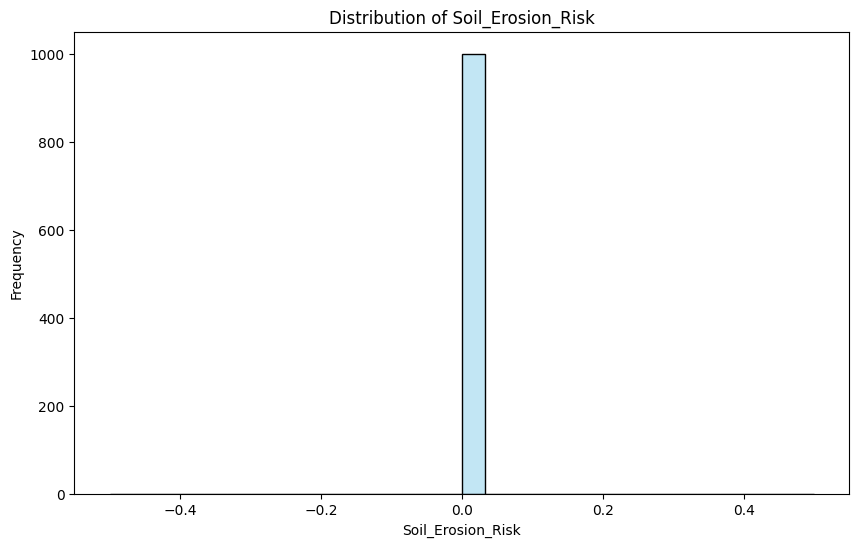

In [51]:
# Distribution plots for numerical columns
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

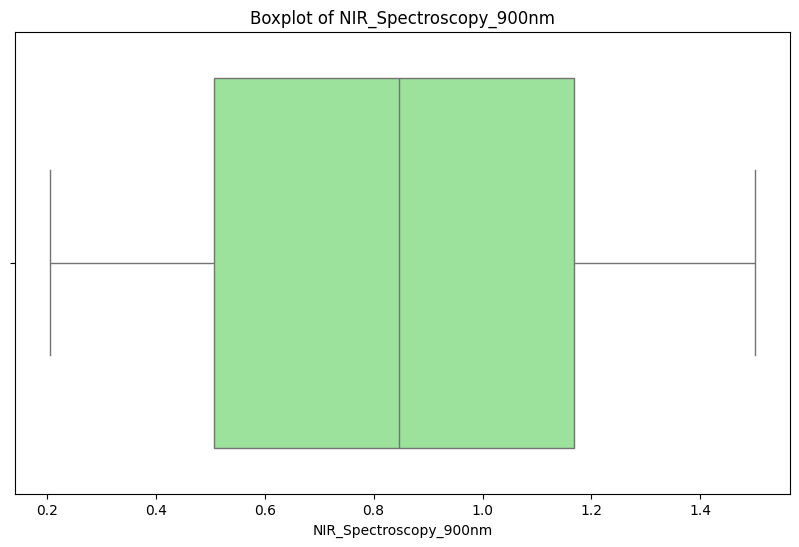

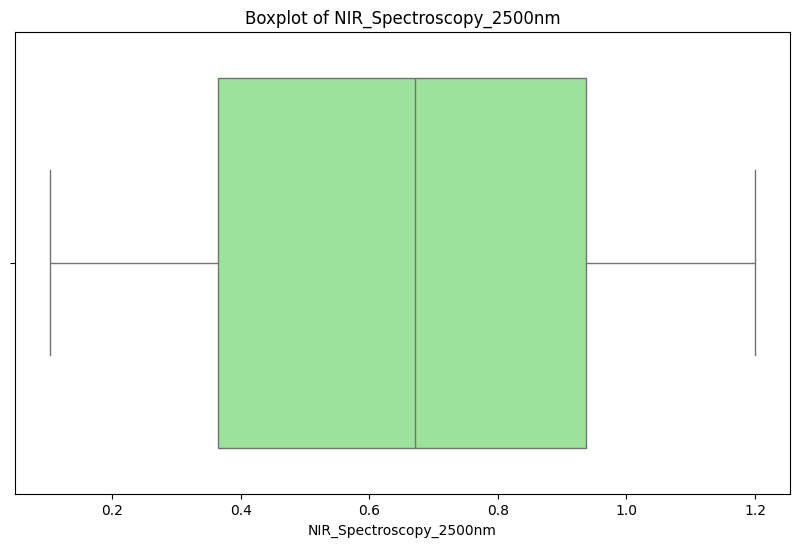

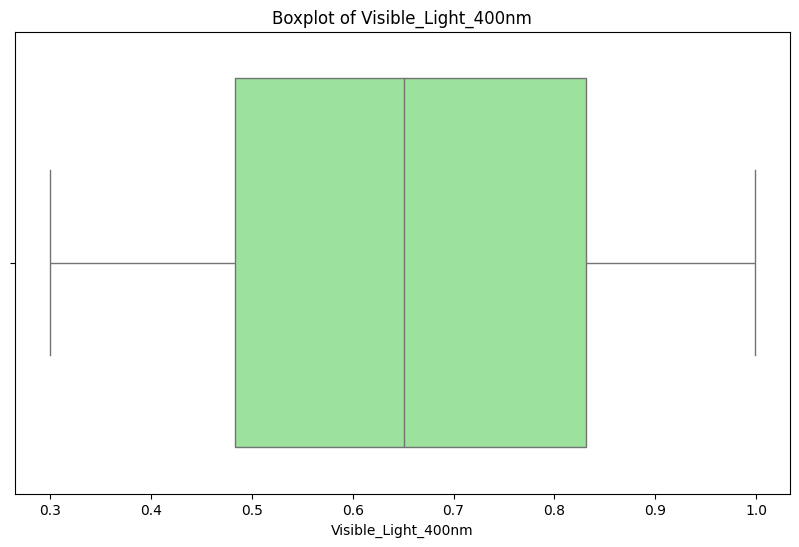

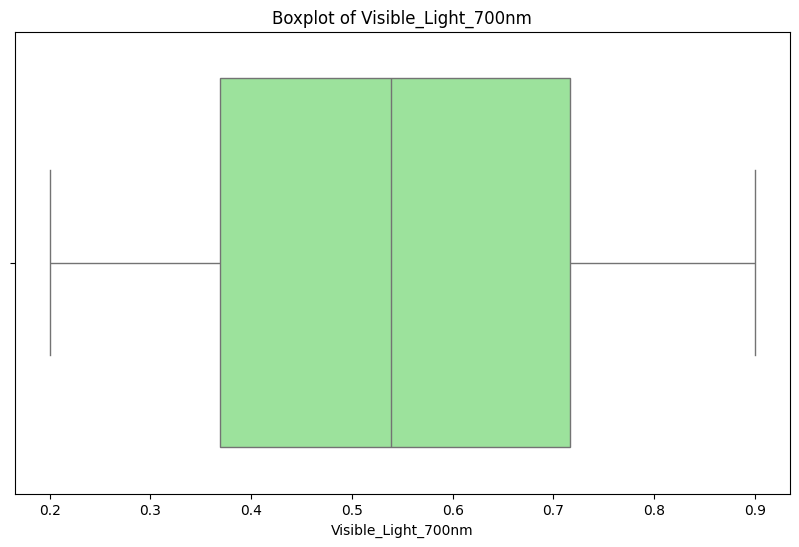

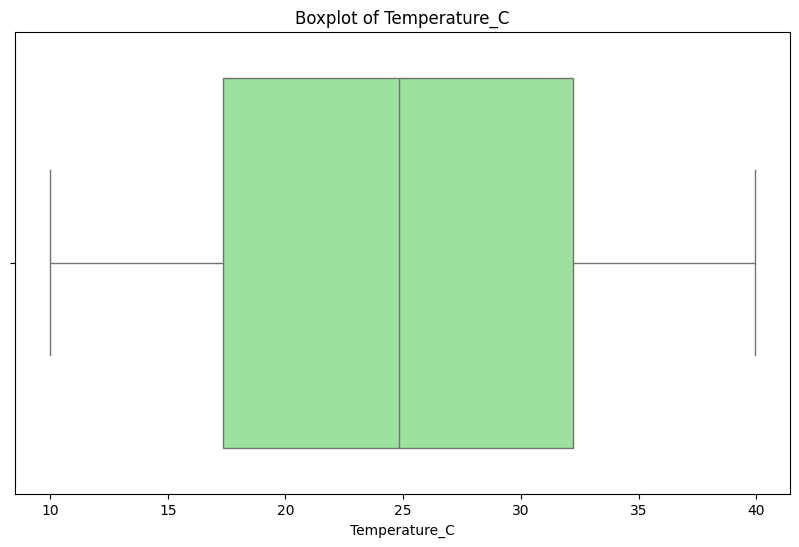

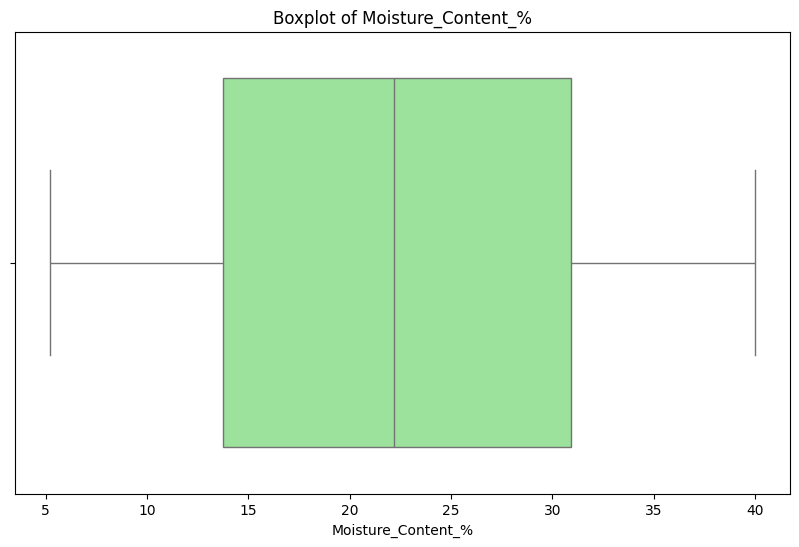

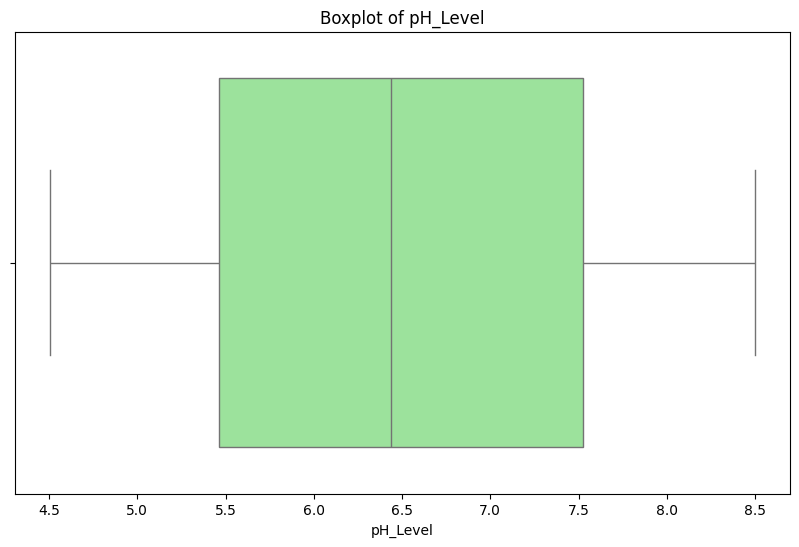

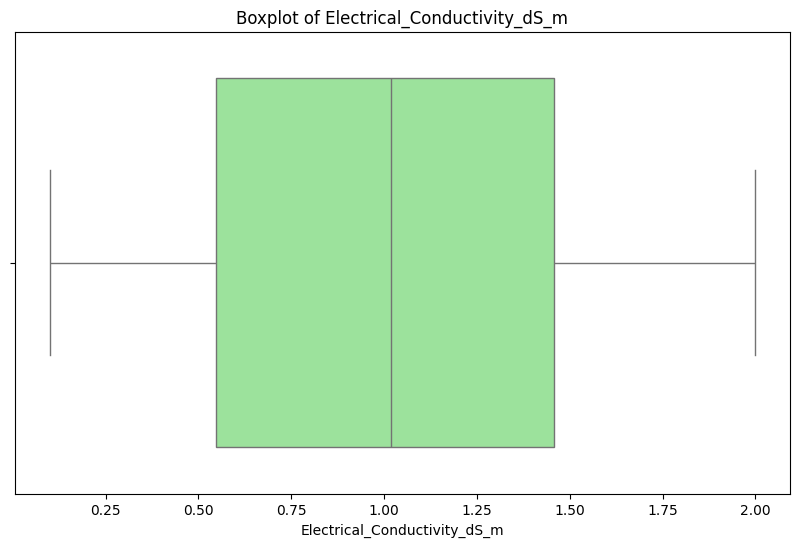

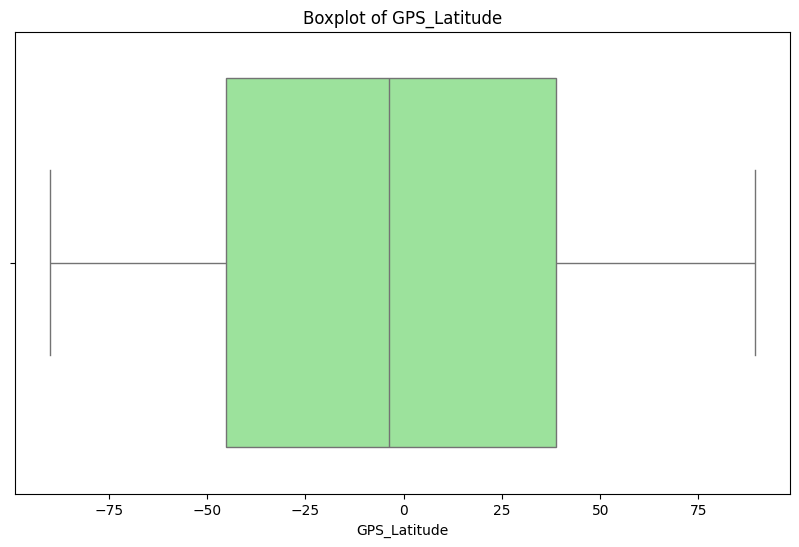

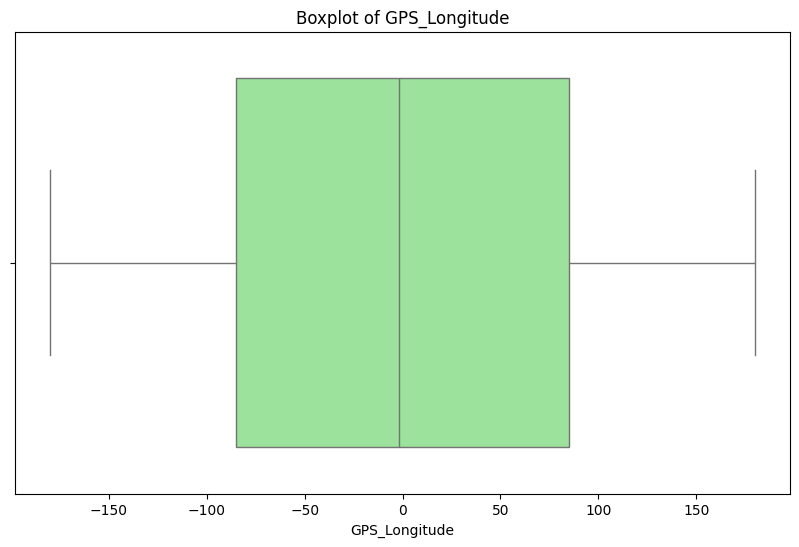

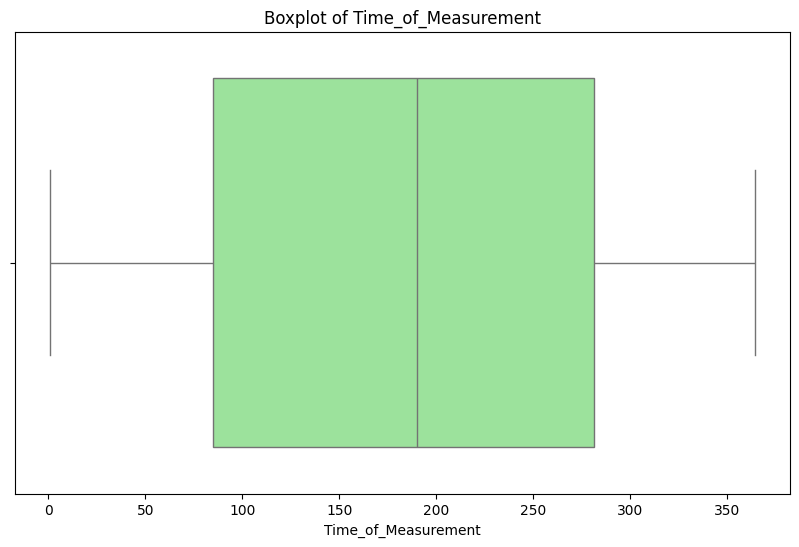

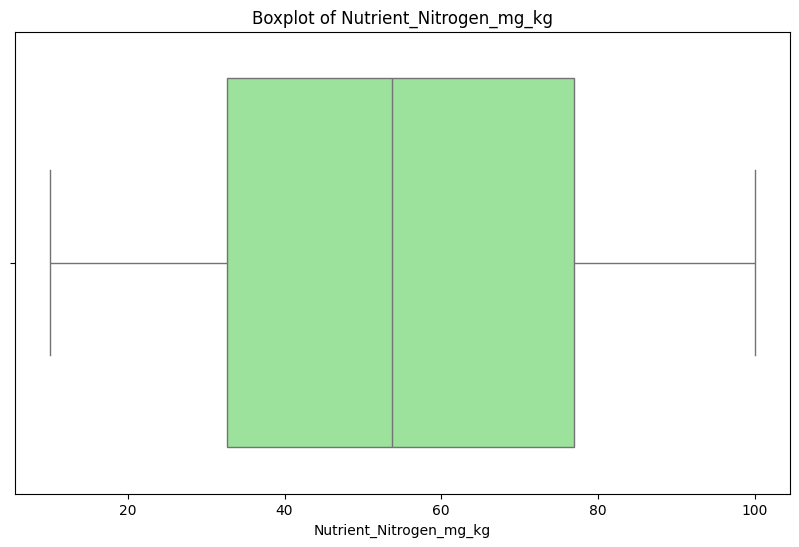

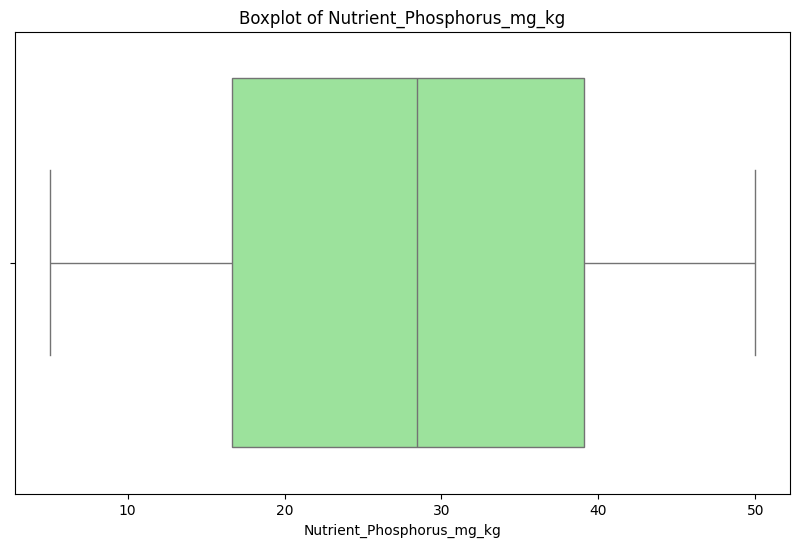

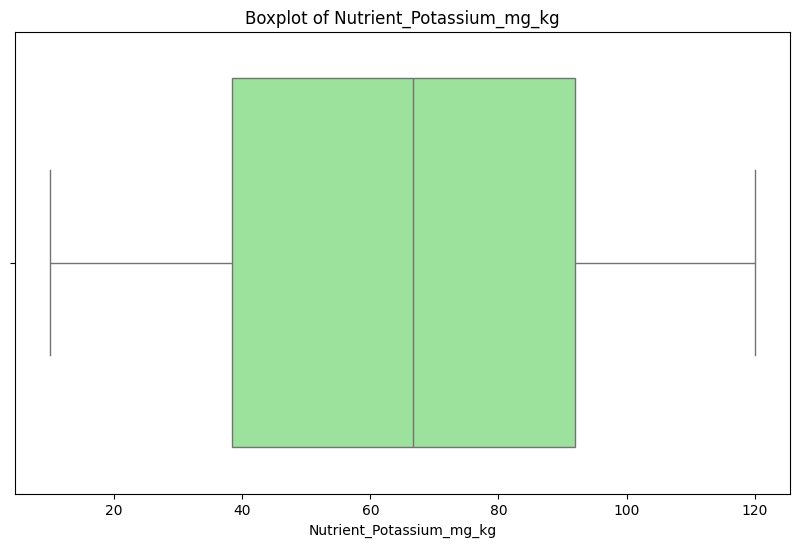

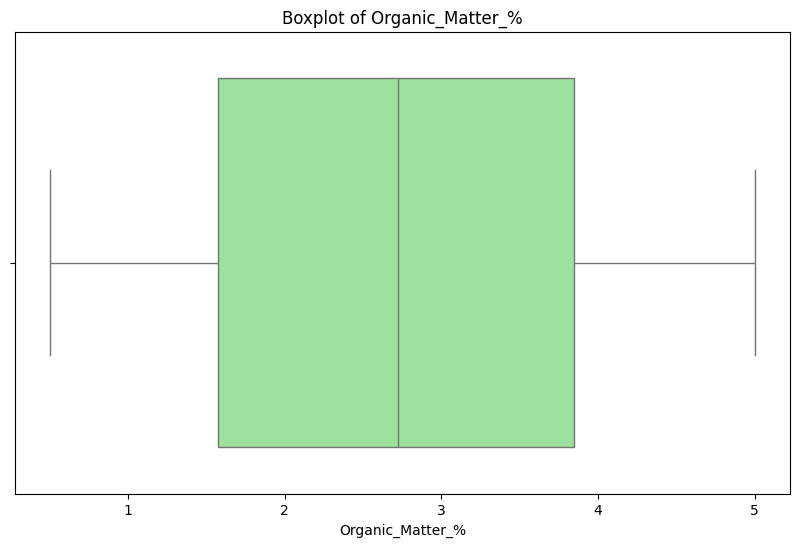

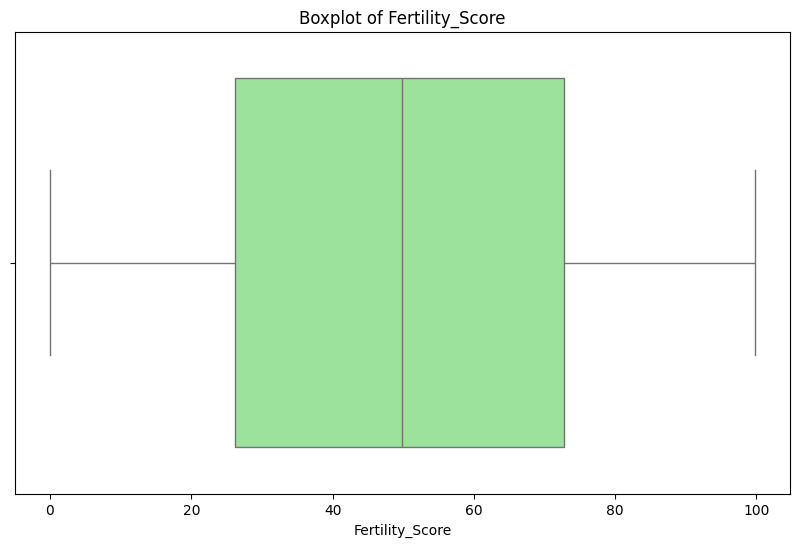

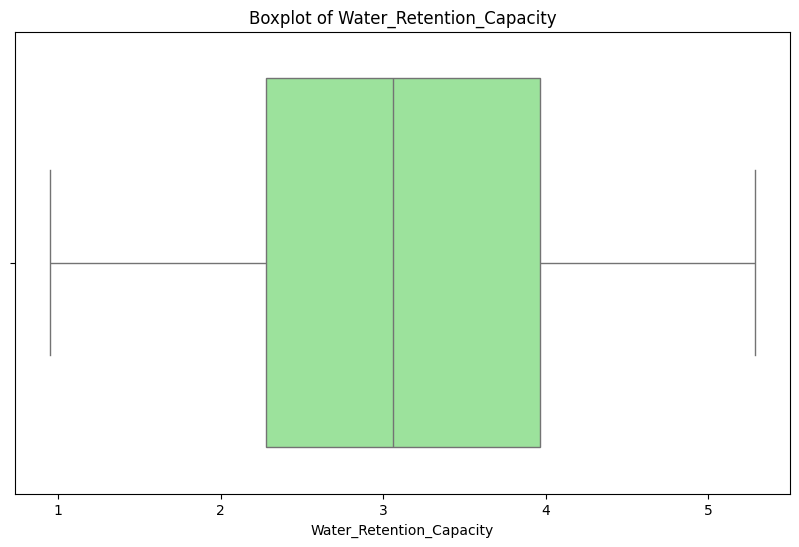

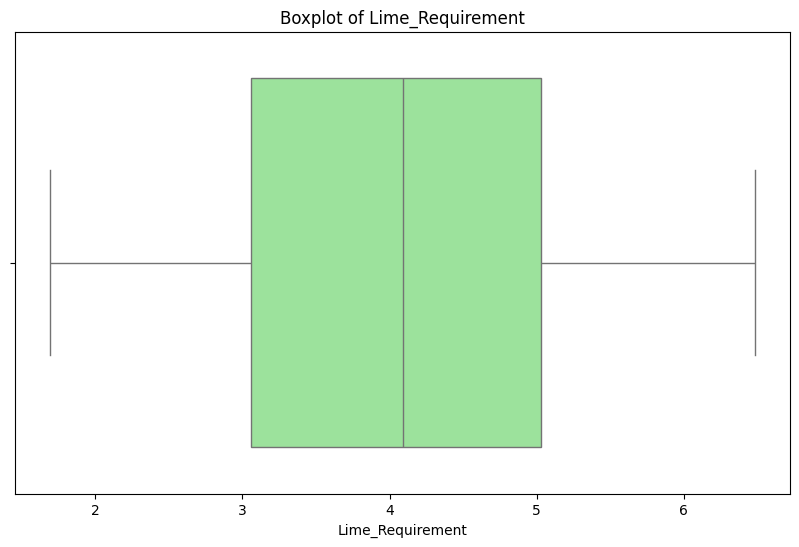

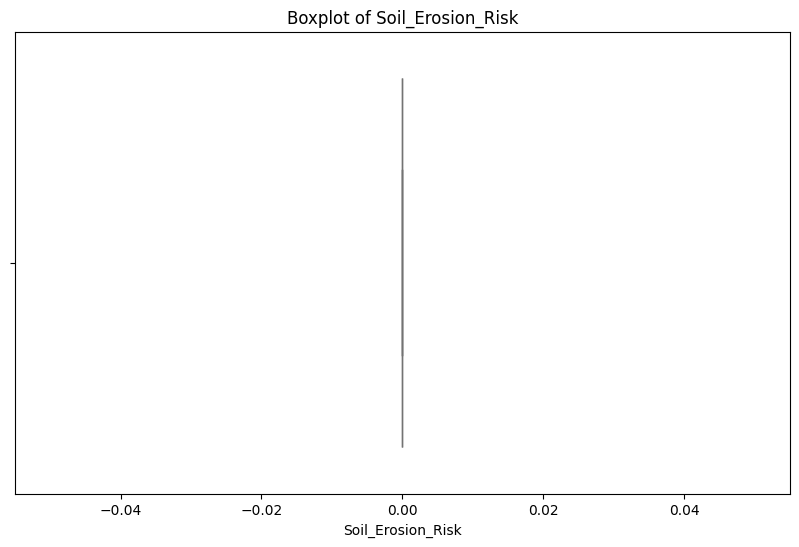

In [52]:
# Boxplots for numerical features (to show spread and outliers)
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")

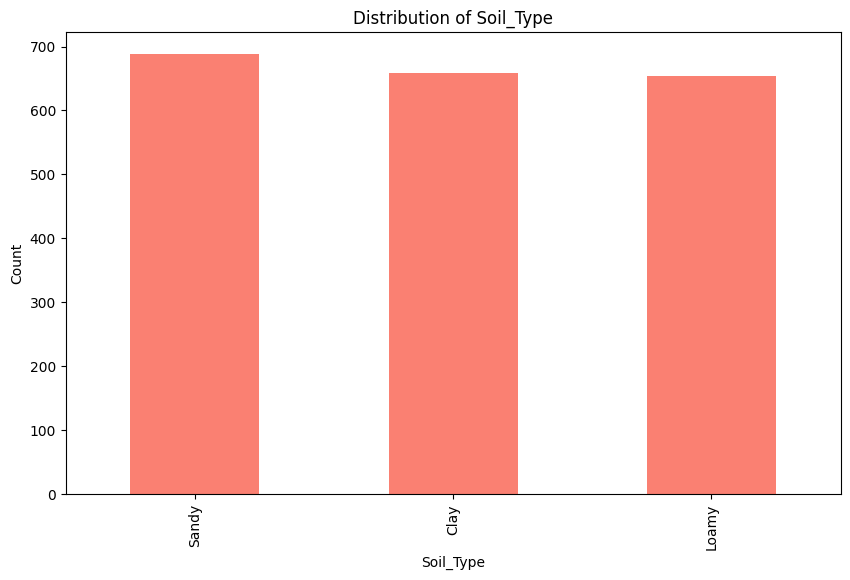

In [53]:
# Categorical columns distribution (e.g. Soil_Type, Time_Category)
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind="bar", color='salmon')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

## Feature Engineering

In [54]:
'''# Feature Engineering
df['Soil_Texture_Index'] = df['NIR_Spectroscopy_900nm'] / df['NIR_Spectroscopy_2500nm']
df['NPK_Ratio'] = (df['Nutrient_Nitrogen_mg_kg'] + df['Nutrient_Phosphorus_mg_kg'] + df['Nutrient_Potassium_mg_kg']) / 3
df['pH_Balance'] = np.abs(df['pH_Level'] - 6.5)
df['NIR_Ratio'] = df['NIR_Spectroscopy_900nm'] / df['NIR_Spectroscopy_2500nm']
df['Visible_Ratio'] = df['Visible_Light_400nm'] / df['Visible_Light_700nm']
df['Temp_Moisture_Interaction'] = df['Temperature_C'] * df['Moisture_Content_%']
df['Time_Category'] = pd.cut(df['Time_of_Measurement'] % 24,
                              bins=[0, 6, 12, 18, 24],
                              labels=['Night', 'Morning', 'Afternoon', 'Evening'])'''

"# Feature Engineering\ndf['Soil_Texture_Index'] = df['NIR_Spectroscopy_900nm'] / df['NIR_Spectroscopy_2500nm']\ndf['NPK_Ratio'] = (df['Nutrient_Nitrogen_mg_kg'] + df['Nutrient_Phosphorus_mg_kg'] + df['Nutrient_Potassium_mg_kg']) / 3\ndf['pH_Balance'] = np.abs(df['pH_Level'] - 6.5)\ndf['NIR_Ratio'] = df['NIR_Spectroscopy_900nm'] / df['NIR_Spectroscopy_2500nm']\ndf['Visible_Ratio'] = df['Visible_Light_400nm'] / df['Visible_Light_700nm']\ndf['Temp_Moisture_Interaction'] = df['Temperature_C'] * df['Moisture_Content_%']\ndf['Time_Category'] = pd.cut(df['Time_of_Measurement'] % 24,\n                              bins=[0, 6, 12, 18, 24],\n                              labels=['Night', 'Morning', 'Afternoon', 'Evening'])"

In [55]:
'''
# Define Features and Targets
features = df.drop(columns=[
    "Fertility_Score", "Soil_Type", "Water_Retention_Capacity",
    "Lime_Requirement", "Soil_Erosion_Risk",
    "Nutrient_Nitrogen_mg_kg", "Nutrient_Phosphorus_mg_kg",
    "Nutrient_Potassium_mg_kg", "Organic_Matter_%"
], errors='ignore')'''


'\n# Define Features and Targets\nfeatures = df.drop(columns=[\n    "Fertility_Score", "Soil_Type", "Water_Retention_Capacity",\n    "Lime_Requirement", "Soil_Erosion_Risk",\n    "Nutrient_Nitrogen_mg_kg", "Nutrient_Phosphorus_mg_kg", \n    "Nutrient_Potassium_mg_kg", "Organic_Matter_%"\n], errors=\'ignore\')'

In [56]:

'''targets_regression = df[[
    "Fertility_Score", "Nutrient_Nitrogen_mg_kg", "Nutrient_Phosphorus_mg_kg",
    "Nutrient_Potassium_mg_kg", "Organic_Matter_%", "Water_Retention_Capacity",
    "Lime_Requirement", "Soil_Erosion_Risk"
]].dropna()'''

'targets_regression = df[[\n    "Fertility_Score", "Nutrient_Nitrogen_mg_kg", "Nutrient_Phosphorus_mg_kg",\n    "Nutrient_Potassium_mg_kg", "Organic_Matter_%", "Water_Retention_Capacity",\n    "Lime_Requirement", "Soil_Erosion_Risk"\n]].dropna()'

In [57]:

#targets_classification = df['Soil_Type'].dropna()

In [59]:
!pip install -U scikit-learn

In [61]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# ... (Your existing code for data loading, cleaning, and feature engineering) ...
# 2. Enhanced Feature Engineering
print("Performing enhanced feature engineering...")

# a. Create more advanced features
df['Soil_Texture_Index'] = df['NIR_Spectroscopy_900nm'] / df['NIR_Spectroscopy_2500nm']
df['NPK_Total'] = df['Nutrient_Nitrogen_mg_kg'] + df['Nutrient_Phosphorus_mg_kg'] + df['Nutrient_Potassium_mg_kg']
df['NPK_Ratio'] = df['NPK_Total'] / 3
df['pH_Balance'] = np.abs(df['pH_Level'] - 6.5)  # Deviation from neutral pH
df['NIR_Ratio'] = df['NIR_Spectroscopy_900nm'] / df['NIR_Spectroscopy_2500nm']
df['Visible_Ratio'] = df['Visible_Light_400nm'] / df['Visible_Light_700nm']
df['Temp_Moisture_Interaction'] = df['Temperature_C'] * df['Moisture_Content_%']
df['EC_pH_Interaction'] = df['Electrical_Conductivity_dS_m'] * df['pH_Level']
df['Nitrogen_Phosphorus_Ratio'] = df['Nutrient_Nitrogen_mg_kg'] / (df['Nutrient_Phosphorus_mg_kg'] + 0.001)  # Avoid division by zero
df['Organic_pH_Interaction'] = df['Organic_Matter_%'] * df['pH_Level']

# b. Time features (assuming Time_of_Measurement is in hours)
df['Time_Sine'] = np.sin(2 * np.pi * df['Time_of_Measurement'] / 24)
df['Time_Cosine'] = np.cos(2 * np.pi * df['Time_of_Measurement'] / 24)
df['Time_Category'] = pd.cut(df['Time_of_Measurement'] % 24,
                            bins=[0, 6, 12, 18, 24],
                            labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# c. Location-based features
df['Location_Cluster'] = df.apply(lambda row: f"{round(row['GPS_Latitude'], 1)}_{round(row['GPS_Longitude'], 1)}", axis=1)


# 3. Define Features and Targets
print("Defining features and targets...")
features = df.drop(columns=[
    "Fertility_Score", "Soil_Type", "Water_Retention_Capacity",
    "Lime_Requirement", "Soil_Erosion_Risk",
    "Nutrient_Nitrogen_mg_kg", "Nutrient_Phosphorus_mg_kg",
    "Nutrient_Potassium_mg_kg", "Organic_Matter_%"
], errors='ignore')

targets_regression = df[[
    "Fertility_Score", "Nutrient_Nitrogen_mg_kg", "Nutrient_Phosphorus_mg_kg",
    "Nutrient_Potassium_mg_kg", "Organic_Matter_%", "Water_Retention_Capacity",
    "Lime_Requirement", "Soil_Erosion_Risk"
]].dropna()

# 4. Feature selection and target analysis
# Match features to target rows
features_reg = features.loc[targets_regression.index]

# a. Analyze feature importance with a preliminary Random Forest
print("Analyzing feature importance...")

# ----> CHANGES HERE <----
# Create a ColumnTransformer to handle numerical and categorical features
# Identify feature types
categorical_features = features_reg.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = features_reg.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # sparse=False for RandomForest
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Apply the preprocessor to your features
X_prelim = preprocessor.fit_transform(features_reg)
# ----> END OF CHANGES <----

y_prelim = targets_regression["Fertility_Score"]  # Using one target for simplicity
rf_prelim = RandomForestRegressor(n_estimators=100, random_state=42)
rf_prelim.fit(X_prelim, y_prelim)

# Get feature importances for preliminary analysis
# ... (Rest of your code) ...

Performing enhanced feature engineering...
Defining features and targets...
Analyzing feature importance...


RandomForestRegressor(random_state=42)

In [62]:
'''# 2. Enhanced Feature Engineering
print("Performing enhanced feature engineering...")

# a. Create more advanced features
df['Soil_Texture_Index'] = df['NIR_Spectroscopy_900nm'] / df['NIR_Spectroscopy_2500nm']
df['NPK_Total'] = df['Nutrient_Nitrogen_mg_kg'] + df['Nutrient_Phosphorus_mg_kg'] + df['Nutrient_Potassium_mg_kg']
df['NPK_Ratio'] = df['NPK_Total'] / 3
df['pH_Balance'] = np.abs(df['pH_Level'] - 6.5)  # Deviation from neutral pH
df['NIR_Ratio'] = df['NIR_Spectroscopy_900nm'] / df['NIR_Spectroscopy_2500nm']
df['Visible_Ratio'] = df['Visible_Light_400nm'] / df['Visible_Light_700nm']
df['Temp_Moisture_Interaction'] = df['Temperature_C'] * df['Moisture_Content_%']
df['EC_pH_Interaction'] = df['Electrical_Conductivity_dS_m'] * df['pH_Level']
df['Nitrogen_Phosphorus_Ratio'] = df['Nutrient_Nitrogen_mg_kg'] / (df['Nutrient_Phosphorus_mg_kg'] + 0.001)  # Avoid division by zero
df['Organic_pH_Interaction'] = df['Organic_Matter_%'] * df['pH_Level']

# b. Time features (assuming Time_of_Measurement is in hours)
df['Time_Sine'] = np.sin(2 * np.pi * df['Time_of_Measurement'] / 24)
df['Time_Cosine'] = np.cos(2 * np.pi * df['Time_of_Measurement'] / 24)
df['Time_Category'] = pd.cut(df['Time_of_Measurement'] % 24,
                            bins=[0, 6, 12, 18, 24],
                            labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# c. Location-based features
df['Location_Cluster'] = df.apply(lambda row: f"{round(row['GPS_Latitude'], 1)}_{round(row['GPS_Longitude'], 1)}", axis=1)

# 3. Define Features and Targets
print("Defining features and targets...")
features = df.drop(columns=[
    "Fertility_Score", "Soil_Type", "Water_Retention_Capacity",
    "Lime_Requirement", "Soil_Erosion_Risk",
    "Nutrient_Nitrogen_mg_kg", "Nutrient_Phosphorus_mg_kg",
    "Nutrient_Potassium_mg_kg", "Organic_Matter_%"
], errors='ignore')

targets_regression = df[[
    "Fertility_Score", "Nutrient_Nitrogen_mg_kg", "Nutrient_Phosphorus_mg_kg",
    "Nutrient_Potassium_mg_kg", "Organic_Matter_%", "Water_Retention_Capacity",
    "Lime_Requirement", "Soil_Erosion_Risk"
]].dropna()

# 4. Feature selection and target analysis
# Match features to target rows
features_reg = features.loc[targets_regression.index]

# a. Analyze feature importance with a preliminary Random Forest
print("Analyzing feature importance...")
X_prelim = features_reg
y_prelim = targets_regression["Fertility_Score"]  # Using one target for simplicity
rf_prelim = RandomForestRegressor(n_estimators=100, random_state=42)
rf_prelim.fit(X_prelim, y_prelim)

# Get feature importances for preliminary analysis
importance_df = pd.DataFrame({
    'Feature': X_prelim.columns,
    'Importance': rf_prelim.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 important features:")
print(importance_df.head(10))'''

'# 2. Enhanced Feature Engineering\nprint("Performing enhanced feature engineering...")\n\n# a. Create more advanced features\ndf[\'Soil_Texture_Index\'] = df[\'NIR_Spectroscopy_900nm\'] / df[\'NIR_Spectroscopy_2500nm\']\ndf[\'NPK_Total\'] = df[\'Nutrient_Nitrogen_mg_kg\'] + df[\'Nutrient_Phosphorus_mg_kg\'] + df[\'Nutrient_Potassium_mg_kg\']\ndf[\'NPK_Ratio\'] = df[\'NPK_Total\'] / 3\ndf[\'pH_Balance\'] = np.abs(df[\'pH_Level\'] - 6.5)  # Deviation from neutral pH\ndf[\'NIR_Ratio\'] = df[\'NIR_Spectroscopy_900nm\'] / df[\'NIR_Spectroscopy_2500nm\']\ndf[\'Visible_Ratio\'] = df[\'Visible_Light_400nm\'] / df[\'Visible_Light_700nm\']\ndf[\'Temp_Moisture_Interaction\'] = df[\'Temperature_C\'] * df[\'Moisture_Content_%\']\ndf[\'EC_pH_Interaction\'] = df[\'Electrical_Conductivity_dS_m\'] * df[\'pH_Level\']\ndf[\'Nitrogen_Phosphorus_Ratio\'] = df[\'Nutrient_Nitrogen_mg_kg\'] / (df[\'Nutrient_Phosphorus_mg_kg\'] + 0.001)  # Avoid division by zero\ndf[\'Organic_pH_Interaction\'] = df[\'Organic_

##Train-Test Split

In [63]:
# Match features to target rows
features_reg = features.loc[targets_regression.index]
features_cls = features.loc[targets_classification.index]

# Train-Test Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features_reg, targets_regression, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(features_cls, targets_classification, test_size=0.2, random_state=42)

# Identify feature types
categorical_features = features.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = features.select_dtypes(include=['float64', 'int64']).columns.tolist()


In [64]:
categorical_features

['Time_Category', 'Location_Cluster']

In [65]:
numerical_features

['NIR_Spectroscopy_900nm',
 'NIR_Spectroscopy_2500nm',
 'Visible_Light_400nm',
 'Visible_Light_700nm',
 'Temperature_C',
 'Moisture_Content_%',
 'pH_Level',
 'Electrical_Conductivity_dS_m',
 'GPS_Latitude',
 'GPS_Longitude',
 'Time_of_Measurement',
 'Soil_Texture_Index',
 'NPK_Total',
 'NPK_Ratio',
 'pH_Balance',
 'NIR_Ratio',
 'Visible_Ratio',
 'Temp_Moisture_Interaction',
 'EC_pH_Interaction',
 'Nitrogen_Phosphorus_Ratio',
 'Organic_pH_Interaction',
 'Time_Sine',
 'Time_Cosine']

##preprocessing pipeline

In [66]:
'''# Preprocessing
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])'''

"# Preprocessing\nnumerical_pipeline = Pipeline([\n    ('imputer', SimpleImputer(strategy='median')),\n    ('scaler', StandardScaler())\n])\n\ncategorical_pipeline = Pipeline([\n    ('imputer', SimpleImputer(strategy='most_frequent')),\n    ('encoder', OneHotEncoder(handle_unknown='ignore'))\n])\n\npreprocessor = ColumnTransformer([\n    ('num', numerical_pipeline, numerical_features),\n    ('cat', categorical_pipeline, categorical_features)\n])"

In [68]:
# 6. Improved Preprocessing
print("Creating advanced preprocessing pipeline...")
# a. Using RobustScaler for better outlier handling
from sklearn.impute import KNNImputer # Import KNNImputer
from sklearn.preprocessing import RobustScaler # Import RobustScaler

numerical_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),  # KNN imputation for better handling of missing values
    ('scaler', RobustScaler())  # RobustScaler for better handling of outliers
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])


Creating advanced preprocessing pipeline...


##Model Selection

###Model Improvements and Hyperparameter Tuning

In [69]:
'''

# Regression Models
regressors = {
    "XGBoost": MultiOutputRegressor(xgb.XGBRegressor(random_state=42)),
    "RandomForest": MultiOutputRegressor(RandomForestRegressor(random_state=42))
}

best_reg_model = None
best_score = -np.inf

for name, model in regressors.items():
    pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train_reg, y_train_reg)
    y_pred = pipeline.predict(X_test_reg)
    r2 = r2_score(y_test_reg, y_pred, multioutput='uniform_average')
    if r2 > best_score:
        best_score = r2
        best_reg_model = pipeline
    print(f"{name} R2: {r2:.4f}")'''

'\n\n# Regression Models\nregressors = {\n    "XGBoost": MultiOutputRegressor(xgb.XGBRegressor(random_state=42)),\n    "RandomForest": MultiOutputRegressor(RandomForestRegressor(random_state=42))\n}\n\nbest_reg_model = None\nbest_score = -np.inf\n\nfor name, model in regressors.items():\n    pipeline = Pipeline([(\'preprocessor\', preprocessor), (\'model\', model)])\n    pipeline.fit(X_train_reg, y_train_reg)\n    y_pred = pipeline.predict(X_test_reg)\n    r2 = r2_score(y_test_reg, y_pred, multioutput=\'uniform_average\')\n    if r2 > best_score:\n        best_score = r2\n        best_reg_model = pipeline\n    print(f"{name} R2: {r2:.4f}")'

In [71]:
# 7. Model Improvements and Hyperparameter Tuning
print("Training models with hyperparameter tuning...")
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV # This line imports GridSearchCV

# a. RandomForest with hyperparameter tuning
rf_param_grid = {
    'model__estimator__n_estimators': [100, 200, 300],
    'model__estimator__max_depth': [None, 10, 20, 30],
    'model__estimator__min_samples_split': [2, 5, 10],
    'model__estimator__min_samples_leaf': [1, 2, 4]
}

rf_base = RandomForestRegressor(random_state=42)
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MultiOutputRegressor(rf_base))
])

rf_grid_search = GridSearchCV(
    rf_pipeline,
    param_grid=rf_param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

Training models with hyperparameter tuning...


In [72]:
# Classification'''
'''
classifier = RandomForestClassifier(random_state=42)
cls_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', classifier)
])
cls_pipeline.fit(X_train_cls, y_train_cls)
y_pred_cls = cls_pipeline.predict(X_test_cls)
acc = accuracy_score(y_test_cls, y_pred_cls)
print(f"Classification Accuracy: {acc:.4f}")'''

'\nclassifier = RandomForestClassifier(random_state=42)\ncls_pipeline = Pipeline([\n    (\'preprocessor\', preprocessor),\n    (\'model\', classifier)\n])\ncls_pipeline.fit(X_train_cls, y_train_cls)\ny_pred_cls = cls_pipeline.predict(X_test_cls)\nacc = accuracy_score(y_test_cls, y_pred_cls)\nprint(f"Classification Accuracy: {acc:.4f}")'

In [73]:
# b. XGBoost with hyperparameter tuning
xgb_param_grid = {
    'model__estimator__n_estimators': [100, 200, 300],
    'model__estimator__max_depth': [3, 5, 7],
    'model__estimator__learning_rate': [0.01, 0.05, 0.1],
    'model__estimator__subsample': [0.8, 0.9, 1.0],
    'model__estimator__colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_base = xgb.XGBRegressor(random_state=42)
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MultiOutputRegressor(xgb_base))
])

xgb_grid_search = GridSearchCV(
    xgb_pipeline,
    param_grid=xgb_param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

In [75]:
!pip install lightgbm
import lightgbm as lgb # Import LightGBM with the alias 'lgb'

# c. LightGBM model (a faster alternative to XGBoost)
lgb_base = lgb.LGBMRegressor(random_state=42)
lgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MultiOutputRegressor(lgb_base))
])

# d. Create an ensemble model
def train_ensemble_model(X_train, y_train, X_test, y_test):
    print("Training ensemble model...")
    # Train base models
    rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
    xgb_model = xgb.XGBRegressor(n_estimators=200, random_state=42)
    lgb_model = lgb.LGBMRegressor(n_estimators=200, random_state=42)
    ridge_model = Ridge(alpha=1.0)

    # Create individual pipelines
    rf_pipe = Pipeline([('preprocessor', preprocessor), ('model', rf_model)])
    xgb_pipe = Pipeline([('preprocessor', preprocessor), ('model', xgb_model)])
    lgb_pipe = Pipeline([('preprocessor', preprocessor), ('model', lgb_model)])
    ridge_pipe = Pipeline([('preprocessor', preprocessor), ('model', ridge_model)])

    # Train individual models on first target column for demonstration
    target_col = y_train.columns[0]
    rf_pipe.fit(X_train, y_train[target_col])
    xgb_pipe.fit(X_train, y_train[target_col])
    lgb_pipe.fit(X_train, y_train[target_col])
    ridge_pipe.fit(X_train, y_train[target_col])

    # Create voting ensemble
    voting_reg = VotingRegressor([
        ('rf', rf_pipe),
        ('xgb', xgb_pipe),
        ('lgb', lgb_pipe),
        ('ridge', ridge_pipe)
    ])

    # Create stacking ensemble
    stacking_reg = StackingRegressor(
        estimators=[
            ('rf', rf_pipe),
            ('xgb', xgb_pipe),
            ('lgb', lgb_pipe)
        ],
        final_estimator=ridge_pipe
    )

    # Results would need to be processed differently for multi-output regression
    # This is a simplified demonstration
    print("Note: For actual implementation, create separate ensemble models for each target")

    return rf_pipe, xgb_pipe, lgb_pipe, ridge_pipe


In [77]:
# Quick model evaluation without GridSearchCV
models = {
    "RandomForest": MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)),
    "XGBoost": MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)),
    "LightGBM": MultiOutputRegressor(lgb.LGBMRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42))
}

results = {}
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])

    # Train model
    print(f"Training {name}...")
    pipeline.fit(X_train_reg, y_train_reg)

    # Evaluate
    y_pred = pipeline.predict(X_test_reg)
    r2 = r2_score(y_test_reg, y_pred, multioutput='uniform_average')
    results[name] = {'model': pipeline, 'r2_score': r2}
    print(f"{name} - R²: {r2:.4f}")

# Select best model
best_model_name = max(results.keys(), key=lambda k: results[k]['r2_score'])
best_model = results[best_model_name]['model']
print(f"Best model: {best_model_name} with R² = {results[best_model_name]['r2_score']:.4f}")

Training RandomForest...
RandomForest - R²: 0.7351
Training XGBoost...
XGBoost - R²: 0.7225
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5596
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 27
[LightGBM] [Info] Start training from score 49.991347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [78]:
# Save Models
joblib.dump(best_reg_model, "final_combined_regression_model.pkl")
joblib.dump(cls_pipeline, "final_combined_classification_model.pkl")

['final_combined_classification_model.pkl']

In [79]:
# Save your finalized trained model
import joblib
joblib.dump(best_model, "final_soil_analysis_model.pkl")

['final_soil_analysis_model.pkl']